In [1]:
# Uncomment the following 2 codes when you are debugging and need multiple outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# Lecture "Basic Math Tools"
# Supplementary Material
#
# Technische Universität München, Fakultät für Informatik
# Walter Simson
# 2017

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Make Matplotlib non-blocking
plt.ion()

# Import the image using Image from pillow (already imported above)
# hint convert it to a numpy array with np.asarray()
# personally I have tried, but seems of no use

#   Original Method, but will raise Error: 
#   Image data of dtype object cannot be converted to float.
#   for not able to convert PIL.Image to float type

# im = np.array(Image.open("tire.tif", mode='r'))
# plt.figure()
# plt.imshow(im,cmap='bone')
# plt.title('Original Image ')
# plt.draw()

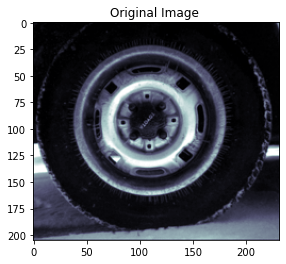

In [2]:
# To fix the error, import a new Module libtiff to deal with tiff data
# Also in order to distinguish from the original file, use the name "image" below
from libtiff import TIFF
tif = TIFF.open('tire.tif') # to open a tiff file for reading
image = tif.read_image() # to read an image in the currect TIFF directory and return it as numpy array
plt.figure()
plt.imshow(image,cmap='bone')
plt.title('Original Image ')
plt.draw()

![title](Pic_1.png)

In [3]:
# Use NumPy to calculate the Singular Value Decomposition of the image
[U, S, V] = np.linalg.svd(image)

![title](Pic_2.png)

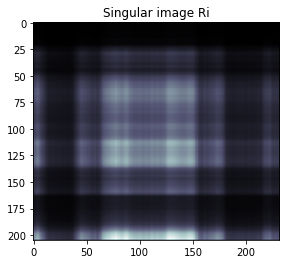

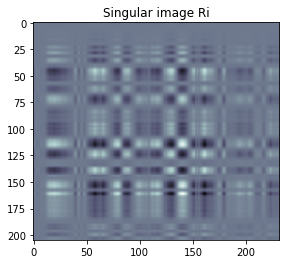

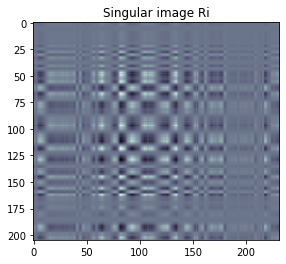

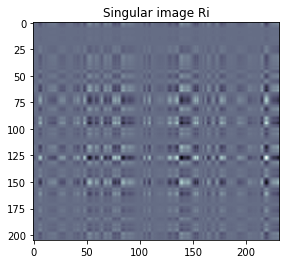

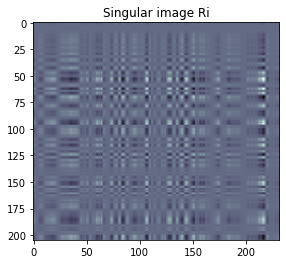

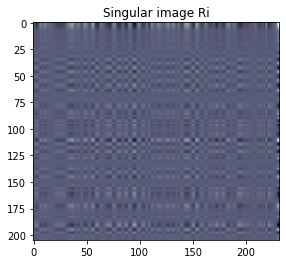

In [4]:
# Image compression / Visualize Intermidiate images
sample_size = 30
R = np.zeros(image.shape)

for i in range(sample_size):
    # Visualize some rank 1 matrices (Ri)
    Ri = S[i]* np.outer(U[:,i],V.T[:,i])

    # Approximate the original image (R)
    R = R + Ri
    
    if i in range(0,sample_size,5):
        plt.figure()
        plt.imshow(Ri,cmap='bone')
        plt.title('Singular image Ri')
        plt.draw
        

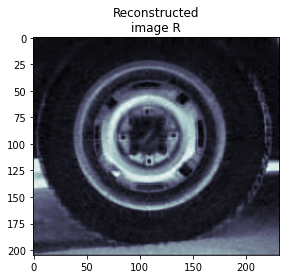

In [5]:
# recovered image
plt.figure()
plt.imshow(R,cmap='bone')
plt.title('Reconstructed\nimage R')
plt.draw()